# The Crank-Nicolson Method

The [Crank-Nicolson method](http://en.wikipedia.org/wiki/Crank%E2%80%93Nicolson_method) is a well-known finite difference method for the
numerical integration of the heat equation and closely related partial differential equations.

We often resort to a Crank-Nicolson (CN) scheme when we integrate numerically reaction-diffusion systems in one space dimension

$$\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2} + f(u),$$

$$\frac{\partial u}{\partial x}\Bigg|_{x = 0, L} = 0,$$

where $u$ is our concentration variable, $x$ is the space variable, $D$ is the diffusion coefficient of $u$, $f$ is the reaction term,
and $L$ is the length of our one-dimensional space domain.

Note that we use [Neumann boundary conditions](http://en.wikipedia.org/wiki/Neumann_boundary_condition) and specify that the solution
$u$ has zero space slope at the boundaries, effectively prohibiting entrance or exit of material at the boundaries (no-flux boundary conditions).

## Finite Difference Methods

Many fantastic textbooks and tutorials have been written about finite difference methods, for instance a free textbook by
[Lloyd Trefethen](http://people.maths.ox.ac.uk/trefethen/pdetext.html).

Here we describe a few basic aspects of finite difference methods.

The above reaction-diffusion equation describes the time evolution of variable $u(x,t)$ in one space dimension ($u$ is a line concentration).
If we knew an analytic expression for $u(x,t)$ then we could plot $u$ in a two-dimensional coordinate system with axes $t$ and $x$.

To approximate $u(x,t)$ numerically we discretize this two-dimensional coordinate system resulting, in the simplest case, in a
two-dimensional [regular grid](http://en.wikipedia.org/wiki/Regular_grid).
This picture is employed commonly when constructing finite differences methods, see for instance 
[Figure 3.2.1 of Trefethen](http://people.maths.ox.ac.uk/trefethen/3all.pdf).

Let us discretize both time and space as follows:

$$t_n = n \Delta t,~ n = 0, \ldots, N-1,$$

$$x_j = j \Delta x,~ j = 0, \ldots, J-1,$$

where $N$ and $J$ are the number of discrete time and space points in our grid respectively.
$\Delta t$ and $\Delta x$ are the time step and space step respectively and defined as follows:

$$\Delta t = T / N,$$

$$\Delta x = L / J,$$

where $T$ is the point in time up to which we will integrate $u$ numerically.

Our ultimate goal is to construct a numerical method that allows us to approximate the unknonwn analytic solution $u(x,t)$
reasonably well in these discrete grid points.

That is we want construct a method that computes values $U(j \Delta x, n \Delta t)$ (note: capital $U$) so that

$$U(j \Delta x, n \Delta t) \approx u(j \Delta x, n \Delta t)$$

As a shorthand we will write $U_j^n = U(j \Delta x, n \Delta t)$ and $(j,n)$ to refer to grid point $(j \Delta x, n \Delta t)$.

## The Crank-Nicolson Stencil

Based on the two-dimensional grid we construct we then approximate the operators of our reaction-diffusion system.

For instance, to approximate the time derivative on the left-hand side in grid point $(j,n)$ we use the values of $U$ in two specific grid points:

$$\frac{\partial u}{\partial t}\Bigg|_{x = j \Delta x, t = n \Delta t} \approx \frac{U_j^{n+1} - U_j^n}{\Delta t}.$$

We can think of this scheme as a stencil that we superimpose on our $(x,t)$-grid and this particular stencil is
commonly referred to as [forward difference](http://en.wikipedia.org/wiki/Finite_difference#Forward.2C_backward.2C_and_central_differences).

The spatial part of the [Crank-Nicolson stencil](http://journals.cambridge.org/abstract_S0305004100023197)
(or see [Table 3.2.2 of Trefethen](http://people.maths.ox.ac.uk/trefethen/3all.pdf))
for the heat equation ($u_t = u_{xx}$) approximates the 
[Laplace operator](http://en.wikipedia.org/wiki/Laplace_operator) of our equation and takes the following form

$$\frac{\partial^2 u}{\partial x^2}\Bigg|_{x = j \Delta x, t = n \Delta t} \approx \frac{1}{2 \Delta x^2} \left( U_{j+1}^n - 2 U_j^n + U_{j-1}^n + U_{j+1}^{n+1} - 2 U_j^{n+1} + U_{j-1}^{n+1}\right).$$

To approximate $f(u(j \Delta x, n \Delta t))$ we write simply $f(U_j^n)$.



Applying this stencil to grid point $(j,n)$ gives us the following approximation of our reaction-diffusion equation:

$$\frac{U_j^{n+1} - U_j^n}{\Delta t} = \frac{D}{2 \Delta x^2} \left( U_{j+1}^n - 2 U_j^n + U_{j-1}^n + U_{j+1}^{n+1} - 2 U_j^{n+1} + U_{j-1}^{n+1}\right) + f(U_j^n).$$

## Reordering Stencil into Linear System

Let us define $\sigma = \frac{D \Delta t}{2 \Delta x^2}$ and reorder the above approximation of our reaction-diffusion equation:

$$-\sigma U_{j-1}^{n+1} + (1+2\sigma) U_j^{n+1} -\sigma U_{j+1}^{n+1} = \sigma U_{j-1}^n + (1-2\sigma) U_j^n + \sigma U_{j+1}^n + \Delta t f(U_j^n).$$

This equation makes sense for space indices $j = 1,\ldots,J-2$ but it does not make sense for indices $j=0$ and $j=J-1$ (on the boundaries):

$$j=0:~-\sigma U_{-1}^{n+1} + (1+2\sigma) U_0^{n+1} -\sigma U_{1}^{n+1} = \sigma U_{-1}^n + (1-2\sigma) U_0^n + \sigma U_{1}^n + \Delta t f(U_0^n),$$

$$j=J-1:~-\sigma U_{J-2}^{n+1} + (1+2\sigma) U_{J-1}^{n+1} -\sigma U_{J}^{n+1} = \sigma U_{J-2}^n + (1-2\sigma) U_{J-1}^n + \sigma U_{J}^n + \Delta t f(U_{J-1}^n).$$

The problem here is that the values $U_{-1}^n$ and $U_J^n$ lie outside our grid.

However, we can work out what these values should equal by considering our Neumann boundary condition.
Let us discretize our boundary condition at $j=0$ with the 
[backward difference](http://en.wikipedia.org/wiki/Finite_difference#Forward.2C_backward.2C_and_central_differences) and
at $j=J-1$ with the
[forward difference](http://en.wikipedia.org/wiki/Finite_difference#Forward.2C_backward.2C_and_central_differences):

$$\frac{U_1^n - U_0^n}{\Delta x} = 0,$$

$$\frac{U_J^n - U_{J-1}^n}{\Delta x} = 0.$$

These two equations make it clear that we need to amend our above numerical approximation for
$j=0$ with the identities $U_0^n = U_1^n$ and $U_0^{n+1} = U_1^{n+1}$, and
for $j=J-1$ with the identities $U_{J-1}^n = U_J^n$ and $U_{J-1}^{n+1} = U_J^{n+1}$.

Let us reinterpret our numerical approximation of the line concentration of $u$ in a fixed point in time as a vector $\mathbf{U}^n$:

$$\mathbf{U}^n = 
\begin{bmatrix} U_0^n \\ \vdots \\ U_{J-1}^n \end{bmatrix}.$$

Using this notation we can now write our above approximation for a fixed point in time, $t = n \Delta t$, compactly as a linear system:

$$
\begin{bmatrix}
1+\sigma & -\sigma & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 0\\
-\sigma & 1+2\sigma & -\sigma & 0 & 0 & \cdots & 0 & 0 & 0 & 0 \\
0 & -\sigma & 1+2\sigma & -\sigma & \cdots & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & \ddots & \ddots & \ddots & \ddots & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & -\sigma & 1+2\sigma & -\sigma \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -\sigma & 1+\sigma
\end{bmatrix}
\begin{bmatrix}
U_0^{n+1} \\
U_1^{n+1} \\
U_2^{n+1} \\
\vdots \\
U_{J-2}^{n+1} \\
U_{J-1}^{n+1}
\end{bmatrix} =
\begin{bmatrix}
1-\sigma & \sigma & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 0\\
\sigma & 1-2\sigma & \sigma & 0 & 0 & \cdots & 0 & 0 & 0 & 0 \\
0 & \sigma & 1-2\sigma & \sigma & \cdots & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & \ddots & \ddots & \ddots & \ddots & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & \sigma & 1-2\sigma & \sigma \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \sigma & 1-\sigma
\end{bmatrix}
\begin{bmatrix}
U_0^{n} \\
U_1^{n} \\
U_2^{n} \\
\vdots \\
U_{J-2}^{n} \\
U_{J-1}^{n}
\end{bmatrix} +
\begin{bmatrix}
\Delta t f(U_0^n) \\
\Delta t f(U_1^n) \\
\Delta t f(U_2^n) \\
\vdots \\
\Delta t f(U_{J-2}^n) \\
\Delta t f(U_{J-1}^n)
\end{bmatrix}.
$$

Note that since our numerical integration starts with a well-defined initial condition at $n=0$, $\mathbf{U}^0$, the
vector $\mathbf{U}^{n+1}$ on the left-hand side is the only unknown in this system of linear equations.

Thus, to integrate numerically our reaction-diffusion system from time point $n$ to $n+1$ we need to solve numerically for vector $\mathbf{U}^{n+1}$.

Let us call the matrix on the left-hand side $A$, the one on the right-hand side $B$,
and the vector on the right-hand side $\mathbf{f}^n$.
Using this notation we can write the above system as

$$A \mathbf{U}^{n+1} = B \mathbf{U}^n + f^n.$$

In this linear equation, matrices $A$ and $B$ are defined by our problem: we need to specify these matrices once for our
problem and incorporate our boundary conditions in them.
Vector $\mathbf{f}^n$ is a function of $\mathbf{U}^n$ and so needs to be reevaluated in every time point $n$.
We also need to carry out one matrix-vector multiplication every time point, $B \mathbf{U}^n$, and
one vector-vector addition, $B \mathbf{U}^n + f^n$.

The most expensive numerical operation is inversion of matrix $A$ to solve for $\mathbf{U}^{n+1}$, however we may
get away with doing this only once and store the inverse of $A$ as $A^{-1}$:

$$\mathbf{U}^{n+1} = A^{-1} \left( B \mathbf{U}^n + f^n \right).$$

## A Crank-Nicolson Example in Python

Let us apply the CN method to a two-variable reaction-diffusion system that was introduced by 
[Mori *et al.*](http://www.sciencedirect.com/science/article/pii/S0006349508704442):

$$\frac{\partial u}{\partial t} = D_u \frac{\partial^2 u}{\partial x^2} + f(u,v),$$

$$\frac{\partial v}{\partial t} = D_v \frac{\partial^2 v}{\partial x^2} - f(u,v),$$

with Neumann boundary conditions

$$\frac{\partial u}{\partial x}\Bigg|_{x=0,L} = 0,$$

$$\frac{\partial v}{\partial x}\Bigg|_{x=0,L} = 0.$$

The variables of this system, $u$ and $v$, represent the concetrations of the active form and its inactive form respectively.
The reaction term $f(u,v)$ describes the interchange (activation and inactivation) between these two states of the protein.
A particular property of this system is that the inactive has much greater diffusivity that the active form, $D_v \gg D_u$.

Using the CN method to integrate this system numerically, we need to set up two separate approximations

$$A_u \mathbf{U}^{n+1} = B_u \mathbf{U}^n + \mathbf{f}^n,$$

$$A_v \mathbf{V}^{n+1} = B_v \mathbf{V}^n - \mathbf{f}^n,$$

with two different $\sigma$ terms, $\sigma_u = \frac{D_u \Delta t}{2 \Delta x^2}$ and $\sigma_v = \frac{D_v \Delta t}{2 \Delta x^2}$.


# The Crank-Nicolson Method

The [Crank-Nicolson method](http://en.wikipedia.org/wiki/Crank%E2%80%93Nicolson_method) is a well-known finite difference method for the
numerical integration of the heat equation and closely related partial differential equations.

We often resort to a Crank-Nicolson (CN) scheme when we integrate numerically reaction-diffusion systems in one space dimension

$$\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2} + f(u),$$

$$\frac{\partial u}{\partial x}\Bigg|_{x = 0, L} = 0,$$

where $u$ is our concentration variable, $x$ is the space variable, $D$ is the diffusion coefficient of $u$, $f$ is the reaction term,
and $L$ is the length of our one-dimensional space domain.

Note that we use [Neumann boundary conditions](http://en.wikipedia.org/wiki/Neumann_boundary_condition) and specify that the solution
$u$ has zero space slope at the boundaries, effectively prohibiting entrance or exit of material at the boundaries (no-flux boundary conditions).

## Finite Difference Methods

Many fantastic textbooks and tutorials have been written about finite difference methods, for instance a free textbook by
[Lloyd Trefethen](http://people.maths.ox.ac.uk/trefethen/pdetext.html).

Here we describe a few basic aspects of finite difference methods.

The above reaction-diffusion equation describes the time evolution of variable $u(x,t)$ in one space dimension ($u$ is a line concentration).
If we knew an analytic expression for $u(x,t)$ then we could plot $u$ in a two-dimensional coordinate system with axes $t$ and $x$.

To approximate $u(x,t)$ numerically we discretize this two-dimensional coordinate system resulting, in the simplest case, in a
two-dimensional [regular grid](http://en.wikipedia.org/wiki/Regular_grid).
This picture is employed commonly when constructing finite differences methods, see for instance 
[Figure 3.2.1 of Trefethen](http://people.maths.ox.ac.uk/trefethen/3all.pdf).

Let us discretize both time and space as follows:

$$t_n = n \Delta t,~ n = 0, \ldots, N-1,$$

$$x_j = j \Delta x,~ j = 0, \ldots, J-1,$$

where $N$ and $J$ are the number of discrete time and space points in our grid respectively.
$\Delta t$ and $\Delta x$ are the time step and space step respectively and defined as follows:

$$\Delta t = T / N,$$

$$\Delta x = L / J,$$

where $T$ is the point in time up to which we will integrate $u$ numerically.

Our ultimate goal is to construct a numerical method that allows us to approximate the unknonwn analytic solution $u(x,t)$
reasonably well in these discrete grid points.

That is we want construct a method that computes values $U(j \Delta x, n \Delta t)$ (note: capital $U$) so that

$$U(j \Delta x, n \Delta t) \approx u(j \Delta x, n \Delta t)$$

As a shorthand we will write $U_j^n = U(j \Delta x, n \Delta t)$ and $(j,n)$ to refer to grid point $(j \Delta x, n \Delta t)$.

## The Crank-Nicolson Stencil

Based on the two-dimensional grid we construct we then approximate the operators of our reaction-diffusion system.

For instance, to approximate the time derivative on the left-hand side in grid point $(j,n)$ we use the values of $U$ in two specific grid points:

$$\frac{\partial u}{\partial t}\Bigg|_{x = j \Delta x, t = n \Delta t} \approx \frac{U_j^{n+1} - U_j^n}{\Delta t}.$$

We can think of this scheme as a stencil that we superimpose on our $(x,t)$-grid and this particular stencil is
commonly referred to as [forward difference](http://en.wikipedia.org/wiki/Finite_difference#Forward.2C_backward.2C_and_central_differences).

The spatial part of the [Crank-Nicolson stencil](http://journals.cambridge.org/abstract_S0305004100023197)
(or see [Table 3.2.2 of Trefethen](http://people.maths.ox.ac.uk/trefethen/3all.pdf))
for the heat equation ($u_t = u_{xx}$) approximates the 
[Laplace operator](http://en.wikipedia.org/wiki/Laplace_operator) of our equation and takes the following form

$$\frac{\partial^2 u}{\partial x^2}\Bigg|_{x = j \Delta x, t = n \Delta t} \approx \frac{1}{2 \Delta x^2} \left( U_{j+1}^n - 2 U_j^n + U_{j-1}^n + U_{j+1}^{n+1} - 2 U_j^{n+1} + U_{j-1}^{n+1}\right).$$

To approximate $f(u(j \Delta x, n \Delta t))$ we write simply $f(U_j^n)$.

These approximations define the stencil for our numerical method as pictured on [Wikipedia](http://en.wikipedia.org/wiki/Crank%E2%80%93Nicolson_method).

![SVG](https://dl.dropboxusercontent.com/u/129945779/georgio/CN-stencil.svg)

Applying this stencil to grid point $(j,n)$ gives us the following approximation of our reaction-diffusion equation:

$$\frac{U_j^{n+1} - U_j^n}{\Delta t} = \frac{D}{2 \Delta x^2} \left( U_{j+1}^n - 2 U_j^n + U_{j-1}^n + U_{j+1}^{n+1} - 2 U_j^{n+1} + U_{j-1}^{n+1}\right) + f(U_j^n).$$

## Reordering Stencil into Linear System

Let us define $\sigma = \frac{D \Delta t}{2 \Delta x^2}$ and reorder the above approximation of our reaction-diffusion equation:

$$-\sigma U_{j-1}^{n+1} + (1+2\sigma) U_j^{n+1} -\sigma U_{j+1}^{n+1} = \sigma U_{j-1}^n + (1-2\sigma) U_j^n + \sigma U_{j+1}^n + \Delta t f(U_j^n).$$

This equation makes sense for space indices $j = 1,\ldots,J-2$ but it does not make sense for indices $j=0$ and $j=J-1$ (on the boundaries):

$$j=0:~-\sigma U_{-1}^{n+1} + (1+2\sigma) U_0^{n+1} -\sigma U_{1}^{n+1} = \sigma U_{-1}^n + (1-2\sigma) U_0^n + \sigma U_{1}^n + \Delta t f(U_0^n),$$

$$j=J-1:~-\sigma U_{J-2}^{n+1} + (1+2\sigma) U_{J-1}^{n+1} -\sigma U_{J}^{n+1} = \sigma U_{J-2}^n + (1-2\sigma) U_{J-1}^n + \sigma U_{J}^n + \Delta t f(U_{J-1}^n).$$

The problem here is that the values $U_{-1}^n$ and $U_J^n$ lie outside our grid.

However, we can work out what these values should equal by considering our Neumann boundary condition.
Let us discretize our boundary condition at $j=0$ with the 
[backward difference](http://en.wikipedia.org/wiki/Finite_difference#Forward.2C_backward.2C_and_central_differences) and
at $j=J-1$ with the
[forward difference](http://en.wikipedia.org/wiki/Finite_difference#Forward.2C_backward.2C_and_central_differences):

$$\frac{U_1^n - U_0^n}{\Delta x} = 0,$$

$$\frac{U_J^n - U_{J-1}^n}{\Delta x} = 0.$$

These two equations make it clear that we need to amend our above numerical approximation for
$j=0$ with the identities $U_0^n = U_1^n$ and $U_0^{n+1} = U_1^{n+1}$, and
for $j=J-1$ with the identities $U_{J-1}^n = U_J^n$ and $U_{J-1}^{n+1} = U_J^{n+1}$.

Let us reinterpret our numerical approximation of the line concentration of $u$ in a fixed point in time as a vector $\mathbf{U}^n$:

$$\mathbf{U}^n = 
\begin{bmatrix} U_0^n \\ \vdots \\ U_{J-1}^n \end{bmatrix}.$$

Using this notation we can now write our above approximation for a fixed point in time, $t = n \Delta t$, compactly as a linear system:

$$
\begin{bmatrix}
1+\sigma & -\sigma & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 0\\
-\sigma & 1+2\sigma & -\sigma & 0 & 0 & \cdots & 0 & 0 & 0 & 0 \\
0 & -\sigma & 1+2\sigma & -\sigma & \cdots & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & \ddots & \ddots & \ddots & \ddots & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & -\sigma & 1+2\sigma & -\sigma \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -\sigma & 1+\sigma
\end{bmatrix}
\begin{bmatrix}
U_0^{n+1} \\
U_1^{n+1} \\
U_2^{n+1} \\
\vdots \\
U_{J-2}^{n+1} \\
U_{J-1}^{n+1}
\end{bmatrix} =
\begin{bmatrix}
1-\sigma & \sigma & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 0\\
\sigma & 1-2\sigma & \sigma & 0 & 0 & \cdots & 0 & 0 & 0 & 0 \\
0 & \sigma & 1-2\sigma & \sigma & \cdots & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & \ddots & \ddots & \ddots & \ddots & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & \sigma & 1-2\sigma & \sigma \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \sigma & 1-\sigma
\end{bmatrix}
\begin{bmatrix}
U_0^{n} \\
U_1^{n} \\
U_2^{n} \\
\vdots \\
U_{J-2}^{n} \\
U_{J-1}^{n}
\end{bmatrix} +
\begin{bmatrix}
\Delta t f(U_0^n) \\
\Delta t f(U_1^n) \\
\Delta t f(U_2^n) \\
\vdots \\
\Delta t f(U_{J-2}^n) \\
\Delta t f(U_{J-1}^n)
\end{bmatrix}.
$$

Note that since our numerical integration starts with a well-defined initial condition at $n=0$, $\mathbf{U}^0$, the
vector $\mathbf{U}^{n+1}$ on the left-hand side is the only unknown in this system of linear equations.

Thus, to integrate numerically our reaction-diffusion system from time point $n$ to $n+1$ we need to solve numerically for vector $\mathbf{U}^{n+1}$.

Let us call the matrix on the left-hand side $A$, the one on the right-hand side $B$,
and the vector on the right-hand side $\mathbf{f}^n$.
Using this notation we can write the above system as

$$A \mathbf{U}^{n+1} = B \mathbf{U}^n + f^n.$$

In this linear equation, matrices $A$ and $B$ are defined by our problem: we need to specify these matrices once for our
problem and incorporate our boundary conditions in them.
Vector $\mathbf{f}^n$ is a function of $\mathbf{U}^n$ and so needs to be reevaluated in every time point $n$.
We also need to carry out one matrix-vector multiplication every time point, $B \mathbf{U}^n$, and
one vector-vector addition, $B \mathbf{U}^n + f^n$.

The most expensive numerical operation is inversion of matrix $A$ to solve for $\mathbf{U}^{n+1}$, however we may
get away with doing this only once and store the inverse of $A$ as $A^{-1}$:

$$\mathbf{U}^{n+1} = A^{-1} \left( B \mathbf{U}^n + f^n \right).$$

## A Crank-Nicolson Example in Python

Let us apply the CN method to a two-variable reaction-diffusion system:

$$\frac{\partial u}{\partial t} = D_u \frac{\partial^2 u}{\partial x^2} + f(u,v),$$

$$\frac{\partial v}{\partial t} = D_v \frac{\partial^2 v}{\partial x^2} - f(u,v),$$

with Neumann boundary conditions

$$\frac{\partial u}{\partial x}\Bigg|_{x=0,L} = 0,$$

$$\frac{\partial v}{\partial x}\Bigg|_{x=0,L} = 0.$$

The variables of this system, $u$ and $v$, represent the concetrations of the active form and its inactive form respectively.
The reaction term $f(u,v)$ describes the interchange (activation and inactivation) between these two states of the protein.
A particular property of this system is that the inactive has much greater diffusivity that the active form, $D_v \gg D_u$.

Using the CN method to integrate this system numerically, we need to set up two separate approximations

$$A_u \mathbf{U}^{n+1} = B_u \mathbf{U}^n + \mathbf{f}^n,$$

$$A_v \mathbf{V}^{n+1} = B_v \mathbf{V}^n - \mathbf{f}^n,$$

with two different $\alpha$ terms, $\alpha = \frac{D_u \Delta t}{2 \Delta x^2}$ and $\alpha = \frac{D_v \Delta t}{2 \Delta x^2}$. (In derivation above, $\alpha$ is noted as $\sigma$)

### Systems of equations

##### A) Turing 

$$\frac{\partial u}{\partial t} = D_u \frac{\partial^2 u}{\partial x^2} + 5u - 6v +1,$$

$$\frac{\partial v}{\partial t} = D_v \frac{\partial^2 v}{\partial x^2} + 6u - 7v +1,$$

Original paper: A.M Turing 1952 https://www.dna.caltech.edu/courses/cs191/paperscs191/turing.pdf


##### B) Schnakenberg

$$\frac{\partial u}{\partial t} = D_u \frac{\partial^2 u}{\partial x^2} + c1 - cm1\cdot u + c3(u^2)v,$$

$$\frac{\partial v}{\partial t} = D_v \frac{\partial^2 v}{\partial x^2} + c2 - c3(u^2)v,$$

Original paper: J. Schnakenberg 1979 https://doi.org/10.1016/0022-5193(79)90042-0

#### C) Klika 2021, eq65



$$\frac{\partial u}{\partial t} = a-u+u^2v +  D_u \frac{\partial^2 u}{\partial x^2} ,$$

$$\frac{\partial v}{\partial t} = \frac{b}{(a+b)^2} +  D_v \frac{\partial^2 v}{\partial x^2} $$ 


Original paper: Gorder,Klika,Krause 2021 https://doi.org/10.1007/s00285-021-01552-y


### Code

Package imports


In [1]:
import numpy
import matplotlib.pyplot as plt
from matplotlib import cm
cmap = cm.Spectral_r
import numpy as np
from scipy.sparse import spdiags, diags
from tqdm import tqdm
import copy
from sklearn import preprocessing
from scipy.linalg import solve_banded

Spatial variables

In [2]:
L=40 ; #Lenght of system
x_gridpoints=2
J=L*x_gridpoints;I=J #Number of gridpoints

# D=[0.125,0.5] #Diffusion parameters for Turing system
# D=[1,40] #Diffusion parameters for Schnakenberg system 
# D=[1,1.7] #Diffusion parameters for klika2021_66 system 
D=[1,10] #Diffusion parameters for madz system 


# D=[1,0.10] #Diffusion parameters for klika2021_65 system 
# D=[1,0.0009] #Diffusion parameters for actact system 





initial_dx = float(L)/float(J-1)
initial_dx = 0.1


x_grid = numpy.array([j*initial_dx for j in range(J)])


print(initial_dx)

len(x_grid)

0.1


80

Temporal variables

In [3]:
T = 1000#Total time
t_gridpoints = 2
N=T*t_gridpoints #Number of timepoints
dt = float(T)/float(N-1)
t_grid = numpy.array([n*dt for n in range(N)])
print(dt)

0.5002501250625313


In [4]:
def stability_check(dx,dt):
    return dt/(dx**2)<=1
stability_check(initial_dx,dt)

False

Define initial conditions and cell matrix




In [5]:
n_species=2 #number of chemical species/variables/equations

#Define initial concentrations of chemical system. 
#In this case, a uniform concentration of 0.1 (with some noise) is defined through space for both chemical species. 
U0 = []
perturbation=0.00001
steadystates=[0.1]*n_species
np.random.seed(1)


# a = 0.04
# b =1

# a = 0.2
# b =1.5

# a = 0.2
# b =2

# a = 0.14
# b = 1

# a = 0.1
# b = 1.1

a = 0
b = 1.1




Ustar = [a+b, b/(a+b)**2] #klika65 or madz
# Ustar = [(a+b), (b/(a+b)**2)]
# Ustar = [0.99999202 , 1.00000001] #actact steady state
# Ustar = [0.22353264, 0.38027006] #klika66
print(Ustar)



# Ustar = [(a+b), (b/(a+b)**2)]
for index in range(n_species):
    U0.append(Ustar[index]*(1+np.random.normal(loc=0,scale=0.001,size=J)))


[1.1, 0.9090909090909091]


Define A and B tridiagonal matrix 

In [6]:
#Look back at mathematical derivation above for understanding of the A and B matrices.

def alpha(D,dt,dx,n_species):
    return [D[n]*dt/(2.*dx*dx) for n in range(n_species)]

def A(alphan,J):
    bottomdiag = [-alphan for j in range(J-1)]
    centraldiag = [1.+alphan]+[1.+2.*alphan for j in range(J-2)]+[1.+alphan]
    topdiag = [-alphan for j in range(J-1)]
    diagonals = [bottomdiag,centraldiag,topdiag]
    A = diags(diagonals, [ -1, 0,1]).toarray()
    return A

def B(alphan,J):
    bottomdiag = [alphan for j in range(J-1)]
    centraldiag = [1.-alphan]+[1.-2.*alphan for j in range(J-2)]+[1.-alphan]
    topdiag = [alphan for j in range(J-1)]
    diagonals = [bottomdiag,centraldiag,topdiag]
    B = diags(diagonals, [ -1, 0,1]).toarray()
    return B



In [7]:
#Equations defining the klika2021 system. (eq65)
#params is a vector including the kinetic parameters.

def madz(u,params = [a,b]): 
    a,b = params
    f_u0 = a - u[0] + (u[0]**2)*u[1]
    f_u1 = b - (u[0]**2)*u[1]
    return f_u0,f_u1
    

#### Functions for solver

Plot final solution

In [8]:
def plot1D(U,morphogen='both', savefig=False,filename='1'):
    if morphogen == 0:
        plt.plot(U[0], label='U')
    if morphogen ==1: 
        plt.plot(U[1], label='V')
    if morphogen == 'both': 
        fig,ax = plt.subplots()
        ax.plot(U[0], label='U', color='blue')
        ax.set_ylim(np.amin(U[0]), np.amax(U[0]))


        ax.ticklabel_format(useOffset=False)

        ax2=ax.twinx()
        ax2.plot(U[1], label='V', color='red')
        ax2.set_ylim(np.amin(U[1]), np.amax(U[1]))


        ax.ticklabel_format(useOffset=False)




    plt.ticklabel_format(useOffset=False)
    plt.xlabel('Space')
    plt.ylabel('Time')
    plt.legend()
    if savefig==True:
        plt.savefig('%s_final.png'%filename)
    
    plt.show()
    return fig

Plot solution over time

In [9]:
reduced_t_grid = np.linspace(0,T,T)
def surfpattern(results,grids=[x_grid,reduced_t_grid],growth = 'linear', rate=0, morphogen = 0,savefig=False,filename='1',logResults=False, normalize=False):
    if normalize == True:
        results = [preprocessing.normalize(array, norm="l1") for array in results]

    results = np.transpose(results[morphogen])
    x_grid = grids[0]
    t_grid = grids[1]
    values = results.reshape(len(t_grid),len(x_grid))
    x, t = np.meshgrid(x_grid, t_grid)
    if growth == 'exponential':
        dx_list =  [exponential_growth(initial_dx,t,s=rate) for t in range(T)]
    if growth == 'linear':
        dx_list =  [linear_growth(initial_dx,t,s=rate) for t in range(T)]

    for ti in range(T):
        x[ti] = numpy.array([j*dx_list[ti] for j in range(J)])




    if logResults==True:
        results=np.log(results)
    plt.contourf(x,t,results, cmap=cmap)
    if logResults==True:
        plt.colorbar(label='Concentration (logscale)')
    else:
        plt.colorbar()


    plt.ylabel('Time')
    plt.xlabel('Space')
    if savefig==True:
        plt.savefig('%s_overtime.png'%filename)
    plt.show()





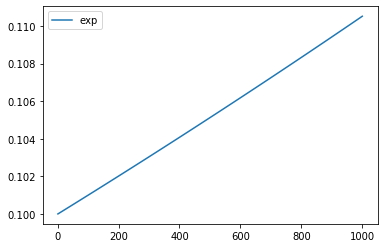

In [10]:
def exponential_growth(initial_dx,t,s=0.0001):
    return initial_dx*np.exp(s*t)


def linear_growth(initial_dx,t,s=0.00005):
    return initial_dx + t*s

def weird_growth(t):
    s=0.01
    tf=1000
    return 40*(2+np.tanh(s*(t-tf/2)))


plt.plot(np.linspace(1,T), [exponential_growth(initial_dx,a) for a in np.linspace(1,T)],label='exp')
# plt.plot(np.linspace(1,1000), [weird_growth(a) for a in np.linspace(1,1000)], label='linear')
plt.legend()


Solve over time $$\mathbf{U}^{n+1} = A^{-1} \left( B \mathbf{U}^n + f^n \right).$$ 

In [11]:
def CN_growth(growth,initial_dx,rate=0.01):
    new_dx = copy.deepcopy(initial_dx)
    U = copy.deepcopy(U0) 
    #copydeepcopy is useful to make sure the original U0 concentration is not modified and we can retrieve it later on if needed. 
    #we will work with U and U_new from here onwards (U_new is the updated U after calculation).

    U_record=[]
    for species_index in range(n_species):
        U_record.append(np.zeros([J, T])) #DO NOT SIMPLIFY TO U_record = [np.zeros([J, I, T])]*n_species

    #These two lists contain the A and B matrices for every chemical specie. They are adapted to the size of the field, 
    #meaning that if the field is J=3, the matrix will be 3x3.
    A_list = [A(alphan,J) for alphan in alpha(D,dt,initial_dx,n_species)]  
    B_list = [B(alphan,J) for alphan in alpha(D,dt,initial_dx,n_species)]  


    A_inv = [np.linalg.inv(a) for a in A_list] # Find inverse matrix of A


    #for loop iterates over time recalculating the chemical concentrations at each timepoint (ti). 
    for ti in tqdm(range(N), disable = False): 


        U_new = copy.deepcopy(U)
        f0 = madz(U)




        #iterate over every chemical specie when calculating concentrations. 
        for n in range(n_species):
            U_new[n] = A_inv[n].dot(B_list[n].dot(U[n]) +  f0[n]*(dt/2)) # Dot product with inverse rather than solve system of equations

        hour = ti / (N / T)

        if growth == 'exponential':
            new_dx = exponential_growth(initial_dx,hour,s=rate)

        if growth == 'linear':
            new_dx = linear_growth(initial_dx,hour,s=rate)
        if growth == 'weird':
            new_dx = weird_growth(hour)

        #A and B must be updated as system size increases. They are calculated with the new J (currentJ)
        A_list = [A(alphan,J) for alphan in alpha(D,dt,new_dx,n_species)]  
        B_list = [B(alphan,J) for alphan in alpha(D,dt,new_dx,n_species)]  
        A_inv = [np.linalg.inv(a) for a in A_list] # Find inverse matrix of A






        if hour % 1 == 0 :  #only grow and record at unit time (hour)
            for n in range(n_species):
                U_record[n][:,int(hour)] = U_new[n] #Solution added into array which records the solution over time (JxT dimensional array)
#             print(hour,new_dx)
#         if hour %10== 0:
#             plot1D(U,morphogen='both', savefig=False)
    

        U = copy.deepcopy(U_new)
    print(new_dx)
    return U,U_record







100%|██████████| 2000/2000 [00:02<00:00, 745.25it/s]


14.804258960969129


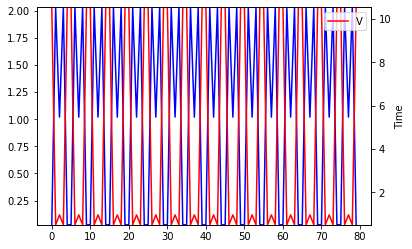

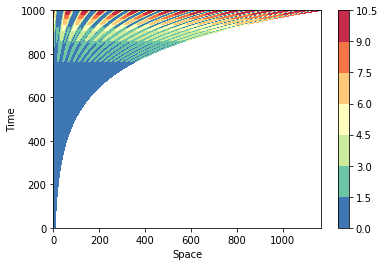

In [12]:
rate=0.005
U,U_record = CN_growth('exponential',initial_dx, rate=rate) #100*5
plot1D(U, savefig=False,filename='')
surfpattern(U_record, growth='exponential', morphogen=1, rate=rate, savefig=False,filename='',logResults=False,normalize=False)
# surfpattern(U_record, morphogen=0, rate=0,savefig=False,filename='',logResults=False,normalize=True)


100%|██████████| 1000/1000 [00:02<00:00, 350.94it/s]


0.201


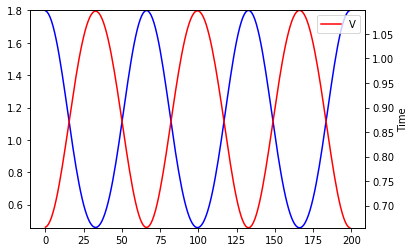

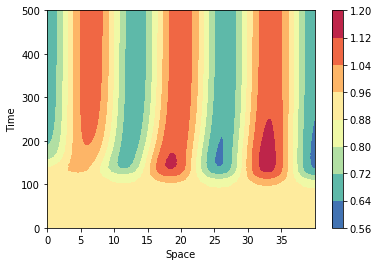

In [258]:
rate=0
U,U_record = CN_growth('linear',initial_dx, rate=rate) #100*5
plot1D(U, savefig=False,filename='')
surfpattern(U_record, morphogen=1, rate=rate, savefig=False,filename='',logResults=False,normalize=False)
# surfpattern(U_record, morphogen=0, rate=0,savefig=False,filename='',logResults=False,normalize=True)


